# Практическое задание 2

- Сахаров Виктор
- Гр. 8383
- Вариант 4

Необходимо дополнить следующий фрагмент кода моделью ИНС, 
которая способна провести бинарную классификацию по сгенерированным данным

### Импортируем необходимые модули

In [1]:
import math
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

### Использующиеся функции

Точки, расположенные в форме двойной спирали (4 вариант)

In [2]:
def genData(size=500):
    #Функцию выбрать в зависимости от варианта
    size1 = size//2
    size2 = size - size1
    t1 = np.random.rand(size1)
    x1 = np.asarray([i * math.cos(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t1])
    y1 = np.asarray([i * math.sin(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t1])
    data1 = np.hstack((x1, y1))
    label1 = np.zeros([size1, 1])
    div1 = round(size1*0.8)
    t2 = np.random.rand(size2)
    x2 = np.asarray([-i * math.cos(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t2])
    y2 = np.asarray([-i * math.sin(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t2])
    data2 = np.hstack((x2, y2))
    label2 = np.ones([size2, 1])
    div2 = round(size2*0.8)
    div = div1 + div2
    order = np.random.permutation(div)
    train_data = np.vstack((data1[:div1], data2[:div2]))
    test_data = np.vstack((data1[div1:], data2[div2:]))
    train_label = np.vstack((label1[:div1], label2[:div2]))
    test_label = np.vstack((label1[div1:], label2[div2:]))
    return (train_data[order, :], train_label[order, :]), (test_data, test_label)

Функция вывода результата запуска модели на тестовых данных

In [3]:
def drawResults(data, label, prediction):
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()

### Создание и обучение модели
Эмпирически было выявлено, что использование двух слоёв по 25 и 5 нейронов соответственно даёт оптимальный результат

In [4]:
(train_data, train_label), (test_data, test_label) = genData()
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

При компиляции используется алгоритм оптимизации RMSprop, так как он хорошо себя зарекомендовал на задачах бинарной классификации. Также, было решено использовать 120 эпох обучения и размер батча, равный 3, так как при иных параметрах происходило либо недообучение, либо переобучение

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
H = model.fit(train_data, train_label, epochs=120, batch_size=3, validation_split=0.1, verbose=False)

Далее происходит вывод результатов на графиках. Данная модель показывает точность, близкую к 100%, на тестовых данных

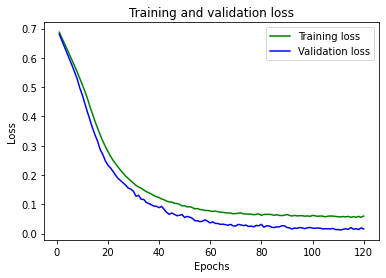

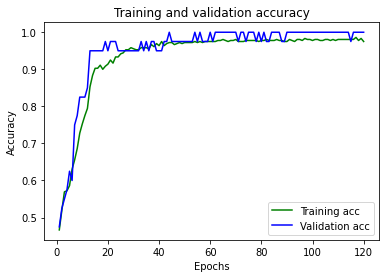

4/4 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9900
[0.02388099394738674, 0.9900000095367432]


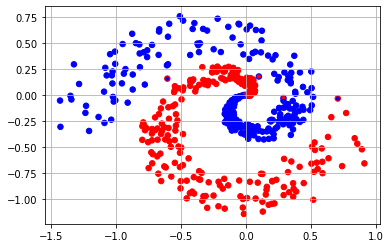

In [6]:
#Получение ошибки и точности в процессе обучения
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)

#Построение графика ошибки
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Построение графика точности
plt.clf()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Получение и вывод результатов на тестовом наборе
results = model.evaluate(test_data, test_label)
print(results)

#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)